In [14]:
%config Completer.use_jedi = False

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import roots_sh_legendre

## V.6

Решите интегральное уравнение на функцию φ(x), где $0 \leq x \leq 1$:
$$
\phi(x) = \int_0^1 \sqrt{x t}  \phi(t) dt + 5 \sqrt{x} ,
$$
используя квадратуру Лежандра либо квадратуру Якоби.

In [5]:
nodes, weights = roots_sh_legendre(4)

print(nodes)
print(weights)

[0.06943184 0.33000948 0.66999052 0.93056816]
[0.17392742 0.32607258 0.32607258 0.17392742]


In [8]:
rhs = lambda x: 5*np.sqrt(x)
k = lambda x,t: np.sqrt(x*t)

A = np.empty((4,4))

for i in range(A.shape[0]):
    for j in range(A.shape[0]):
        A[i][j] = - weights[j]*k(nodes[i], nodes[j])

A += np.eye(A.shape[0])

b = rhs(nodes)

In [9]:
phi_nodes = np.linalg.solve(A, b)
phi_true = lambda x: 10 * np.sqrt(x)

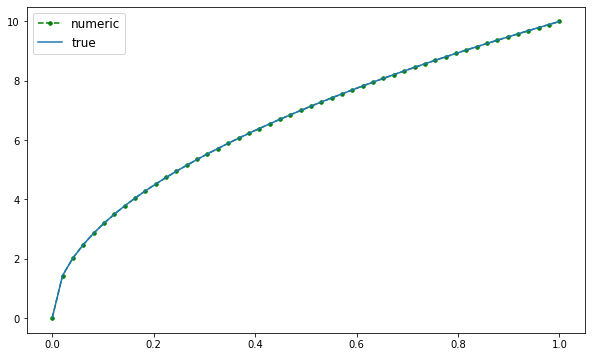

In [16]:
xx = np.linspace(0,1,50)
phi_num = np.array([np.sum([weights[i]*phi_nodes[i]*k(nodes[i],x) for i in range(4)]) + rhs(x) for x in xx])

plt.figure(figsize=(10,6))

plt.plot(xx, phi_num, '--.g', label='numeric', ms=7)
plt.plot(xx, phi_true(xx), label='true')

plt.legend(fontsize=12)
plt.show()